# A/B Testing on Email Subject Line

>**Step 1**: Run the A/B test and collect results
<br>
>**Step 2**: Create our A/B plotting function
<br>
>**Step 3**: Open Rate: Distrubtion of Open Rate A vs Open Rate B
<br>
>**Step 4**: Open Rate: Hypothesis Testing for Open Rate
<br>
>**Step 5**: Click Rate: Graph distrubtion of Click Rate A vs Click Rate B
<br>
>**Step 6**: Click Rate: Hypothesis Testing for Click Rate A vs Click Rate B
<br>
>**Step 7**: Statistical Power analysis
<br>
>**Step 8**: Conclusion and recommendations
<br>

# Step 1: Run the A/B test and collect results

  
We are interested in testing 2 different subject lines for an event invitation, and seeing if there was a significant difference between the open rate and click-to-open rate between the two groups. 

Both emails were sent to 1076 doctors, at the exact same date and time, with the results as follows:


### **Subject Line A**: 
#### Register today! 2 International Speakers - Event Title

>Email was sent to 1076 doctors, where 266 opened the email, and 18 clicked through to the event RSVP link
>
>**Open Rate**: 24.7%
>
>**Click-to-Open Rate**: 6.8%

<br>

### **Subject Line B**:
#### Meeting Invite: 2 International Speakers - Event Title (Limited seating)

>Email was sent to 1076 doctors, where 242 opened the email, and 31 clicked through to the event RSVP link
>
>**Open Rate**: 22.5%
>
>**Click-to-Open Rate**: 12.9%

<br>

For our analysis, we define the results as follows:

In [64]:
A_total = 1076
A_open = 266
A_click = 18

B_total = 1076
B_open = 242
B_click = 31

# Step 2: Create A/B plotting function and hypothesis testing function

<br> 
First let's create a function to plot the distribution of Test A and Test B. 
<br>
<br>
We can assume that it is a binomial distrubtion as the data is a series of Bernoulli trials (each trial only has 2 possible outcomes - for example, customer opens email or doesn't open email).

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
from scipy.stats import mannwhitneyu
from scipy.stats import binom
from scipy.stats import norm

def abdist(A_total, A_converted, B_total, B_converted, confidence_level, show_power=True):
    
    # calculate conversion rate using inputs
    A_cr = A_converted/A_total
    B_cr = B_converted/B_total

    # define the intervals based on the given confidence_level
    ppf_left = scs.binom.ppf((1-confidence_level)/2, A_total, A_cr, loc=0)
    ppf_right = scs.binom.ppf(1-(1-confidence_level)/2, A_total, A_cr, loc=0)
    
    # define plot limits 
    left_A, right_A = scs.binom.interval(0.9999, A_total, A_cr, loc=0)
    left_B, right_B = scs.binom.interval(0.9999, B_total, B_cr, loc=0)
    
    # define text height of labels
    txt_height = scs.binom(A_total, A_cr).pmf(A_converted)+(scs.binom(A_total, A_cr).pmf(A_converted)*0.1)
    
    # plotting distribution for Test A
    fig, ax = plt.subplots(figsize=(12,6))
    xAC = np.linspace(left_A, right_A,(right_A-left_A+1))
    yAC = scs.binom(A_total, A_cr).pmf(xAC)
    ax.bar(xAC, yAC, alpha=0.2, label='Test A', color='blue')
    ax.axvline(x=A_converted, c='blue', alpha=0.75, linestyle='--')
    plt.text(A_converted+0.3,txt_height,f"Test A: {A_converted}",c='blue',rotation=90)
    
    # plotting distrubtion for Test B
    xBC = np.linspace(left_B, right_B,(right_B-left_B+1))
    yBC = scs.binom(B_total, B_cr).pmf(xBC)
    ax.bar(xBC, yBC, alpha=0.2, label='Test B', color='red')
    ax.axvline(x=B_converted, c='red', alpha=0.75, linestyle='--')
    plt.text(B_converted+0.3,txt_height,f"Test B: {B_converted}",c='red',rotation=90)

    # adding in the confidence interval
    ax.axvline(x=ppf_left, c='black', alpha=0.5, linestyle='--')
    plt.text(ppf_left,txt_height,'95%',alpha=0.8,rotation=90)
    ax.axvline(x=ppf_right, c='black', alpha=0.5, linestyle='--')
    plt.text(ppf_right,txt_height,'95%',alpha=0.8,rotation=90)
    
    # fill in area to indicate the statiscal power, if user requests
    if show_power:
        ax.fill_between(xBC, 0, yBC, where=(xBC >= ppf_right), facecolor='brown', alpha=0.5)
        statistical_power = (1 - (scs.binom(242,31/242).cdf(25)))*100
        print(f"The statistical power is {statistical_power:0.1f}%")
        
    plt.xlabel('converted')
    plt.ylabel('probability')
    plt.box(False)
    plt.legend()
    
def hypothesis_test(A_total, A_converted, B_total, B_converted, alpha):
    a_dist = np.zeros(A_total)
    a_dist[:A_converted] = 1
    b_dist = np.zeros(B_total)
    b_dist[:B_converted] = 1

    stat, p_value = mannwhitneyu(a_dist, b_dist, alternative='two-sided')
    print(f"p-value is {p_value:0.3f}")

    if p_value > alpha:
        print(f"As the p-value > {alpha:0.2f}, we cannot reject H0")
    else:
        print(f"As the p-value < {alpha:0.2f}, we can reject H0 and accept H1")

<br>


# Step 3: Distrubtion of Open Rate A vs Open Rate B

To plot the open rate results, 
<br>
Test A = 1076 emails sent, 266 opened
<br>
Test B = 1076 emails sent, 242 opened
<br> 
Confidence interval = 95%

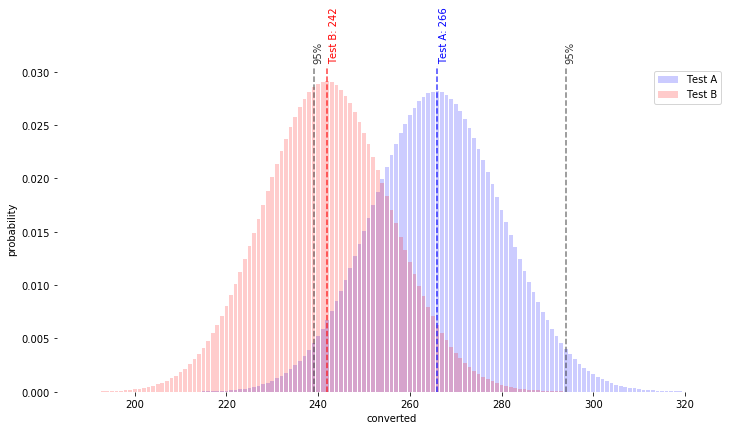

In [66]:
abdist(A_total, A_open, B_total, B_open, 0.95, show_power=False)

We can clearly see from the above graph that the result of Test B lies within our 95% confidence interval. That is, 95% of the time we run Test A, we will get results within this interval. This means that even though we ran Test B and it gave us a different open rate to Test A, it is probable that the difference could simply be due to chance. 

Thus, we cannot conclude that the Test B result varied as a result of the difference in Subject Line, as there's a liklihood we could be seeing this variation due to random chance. 

<br>


# Step 4: Hypothesis Testing for Open Rate

<br>

Let us confirm our observations above using a hypothesis test to test whether there was a statistical difference between the open rates of Email A vs Email B.

>**Null Hypothesis (H0):** 
Open rate of Email A = Open rate of Email B
>
>**Alternative Hypothesis (H1):** 
Open rate of Email A is stastically different to Open rate of Email B

In [75]:
hypothesis_test(A_total, A_open, B_total, B_open, 0.05)

p-value is 0.223
As the p-value > 0.05, we cannot reject H0


Because the p-value is greater than our significance level (alpha = 0.05), we cannot reject the null hypothesis. That is, the difference in open rate which we observed (Test B had -9.02% compared to Test A) could likely have been due to random chance. 

**Thus, there is no real difference in open rate performance between Subject Line A and B, or we may need to collect more data**


<br>

# Step 5: Graph distrubtion of Click Rate A vs Click Rate B

Next we plot the distribution of Test A and Test B when it comes to the click-to-open rate. We are specifically focusing only on the doctors who OPENED the email. 

To plot the click-to-open rate results, 
<br>
Test A = 266 opened, 18 clicked to RSVP link
<br>
Test B = 242 opened, 31 clicked to RSVP link
<br> 
Confidence interval = 95%

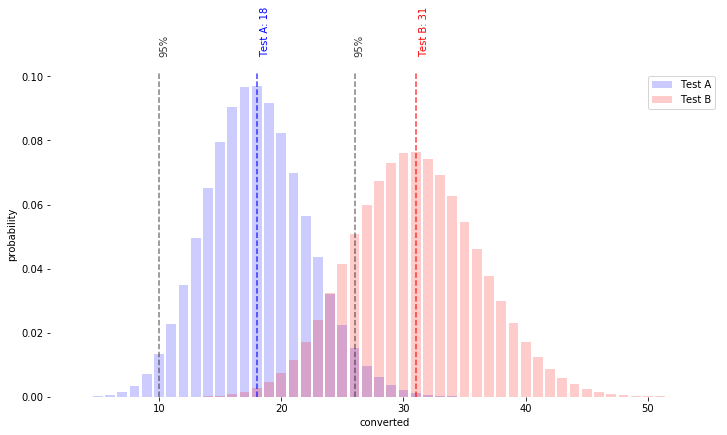

In [68]:
abdist(A_open, A_click, B_open, B_click, 0.95, show_power=False)


We can clearly see from the above graph that the result of Test B lies well outside our 95% confidence interval. Looking at where the Test B result lies within Test A's distribution, we can see that it is extremely unlikely that the difference could have happened purely due to chance. 

Thus, it's likely that we can attribute the significantly improved conversion of Test B to the difference in the Subject Line. 

<br>

# Step 6: Hypothesis Testing for Click Rate A vs Click Rate B

<br>

We can test whether there was a statistical difference between the click-to-open rates of Subject Line A vs Subject Line B.

>**Null Hypothesis (H0):** 
Click-to-open rate of Subject Line A  = Click-to-open rate of Subject Line B
>
>**Alternative Hypothesis (H1):** 
Click-to-open rate of Subject Line A is stastically different to Click-to-open rate of Subject Line B

In [76]:
hypothesis_test(A_open, A_click, B_open, B_click, 0.05)

p-value is 0.021
As the p-value < 0.05, we can reject H0 and accept H1


Because the p-value is less than our significance level (alpha = 0.05), we can reject the null hypothesis and accept the alternative hypothesis (Click-to-open rate of Subject Line A is stastically different to Click-to-open rate of Subject Line B). 

**Therefore, Email B's click-to-open rate was 89.3% higher than Email A's rate. We can be 95% confident that this uplift was due to the change in our Subject Line, and not from random chance.**


<br>

# Step 7: Statistical Power

The significance level we have used (alpha = 0.05) allows us to reduce our probability of getting a Type I error to 5% (that is, only 5% of the time would we reject the null hypothesis when it was actually true). 

However, we also want to look at the Statistical Power of a test, to see the probability that our test correctly rejects the null hypothesis (i.e. a true positive result). This is only applicable when the null hypothesis is rejected, which is the case for our click-to-open rate test. 

The higher the statistical power, the better.

Statistical Power = 1 - (Probability of NOT rejecting H0, given that H0 is false)
= 1 - (probability of commiting a Type II error)

As a standard, we are looking for a Statistical Power > 80%.  

Let's calculate and graph our statistical power so we can see it visually. 

The statistical power is 85.6%


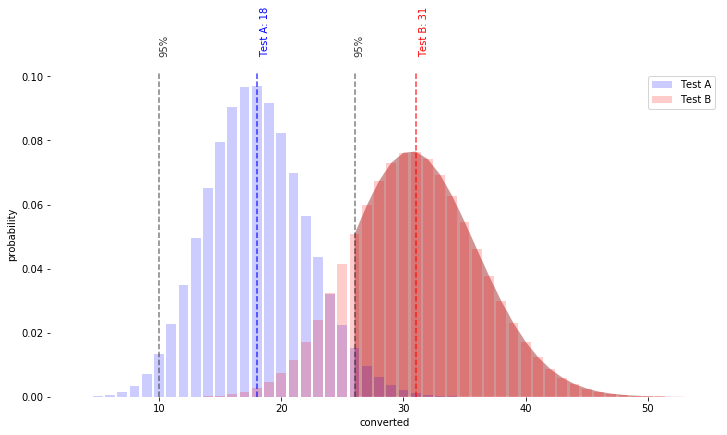

In [70]:
abdist(A_open, A_click, B_open, B_click, 0.95, show_power=True)

<br>In the above plot, the statistical power of the test is equal to the shaded area of dark red. 
<br>
<br>
In our test, the statistical power is 85.6%, which means there is a 85.6% likelihood  that we will not commit a Type II error, which exceeds our minimum requirement of 80%. Thus, we are happy to proceed with the results of this test.

<br>

# Step 7: Conclusion and recommendations

Therefore, based on our testing, we can conclude that the different subject lines we used between Test A and Test B did NOT have a significant impact on the open rate. That is, we could have used Subject Line A for both emails and achieved similar open results. 

**However, it DID have a significant impact on the click-to-open rate. Subject Line B lead to a significantly higher (89.3%) uplift to our click conversion rate. It is likely that the inclusion of the "Limited Seating" within the subject line helped to place urgency on doctors to RSVP quickly.**

A further A/B test could be conducted where the ONLY difference between the subject lines would be the "Limited Seating". For example:
> **Test A**: Meeting Invite: Event Title 
<br>
> **Test B**: Meeting Invite (Limited Seating): Event Title

If that test confirms our results here, then **we can begin to incorporate "Limited Seating" into the subject line of all relevant event e-invitations, as this will help achieve significantly higher click rates.**

Further testing could also be conducted to analyse any differences in conversion rates for doctors who actually did RSVP after they arrived on the page, and then the actual attendance rate. However, with the current numbers we are seeing (i.e. 18 clicks for Test A and 31 clicks for Test B), we would need to have a larger sample size to ensure it is sufficient to draw conclusions from.

Further testing could be done to find a subject line which actually does improve the open rate, which would therefore increase our sample size for clicks and attendances. For example, a few ideas we could try:
- Hi [Name], you're invitation to [Event Name] (Limited Seating)
- This session on [Event Title] is sure to [list benefit] (Limited Seating)
- Limited Seating: Registration now open for [Event Title]